#### What is Lasso Regression ?
##### Lasso Regression (Least Absolute Shrinkage and Selection Operator) is similar to Ridge Regression, but with one key difference—it can eliminate some features by setting their coefficients to zero.

#### How does Lasso Regression Work?
##### Like Ridge Regression, Lasso adds a penalty term to control overfitting.
##### Instead of L2 regularization (squared coefficients) like Ridge, Lasso uses L1 regularization, which shrinks some coefficients to exactly zero.
##### This makes Lasso not just a regression model but also a feature selection technique!

#### Usage
##### Lasso Regression creates sparsity by forcing some feature coefficients to exactly zero.
##### This automatically removes unimportant features, making models more interpretable and efficient.
##### Use cross-validation (LassoCV) to find the best alpha value.
##### Lasso is ideal for feature selection but can struggle if features are highly correlated.

#### How Lasso Regression Creates Sparsity?
##### Lasso uses the L1 penalty, which minimizes the sum of absolute values of the coefficients:
##### Loss = RSS + 𝛼∑∣𝑤𝑖∣
##### Where:
##### RSS = Residual Sum of Squares (error term)
##### α (alpha) = Regularization strength (higher α = more sparsity)
##### wi = Coefficients of the features

#### 🔹 L1 Regularization Shrinks Coefficients to Zero
##### The L1 penalty adds a constant slope to the loss function, making it easier for some weights to reach exactly zero.
##### This leads to feature selection, keeping only the most important features.
##### Ridge (L2) penalty, in contrast, squares the weights, leading to smaller values but never zero.

#### 🔍 Geometric Explanation (L1 vs. L2)
##### Ridge regression's L2 penalty forms a circular constraint region, which shrinks all coefficients uniformly but does not force zeros.
##### Lasso’s L1 penalty forms a diamond-shaped constraint region, which forces some coefficients to become exactly zero when optimization reaches a corner.

#### In regression problems, we don’t use accuracy percentage like classification models. Instead, we measure the model's performance using metrics like:
##### ✔ R² Score (Coefficient of Determination) → Measures how well predictions match actual values.
##### ✔ Mean Absolute Error (MAE) → Average absolute difference between actual & predicted values.
##### ✔ Mean Squared Error (MSE) & RMSE → Penalizes larger errors more.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(sns.load_dataset("tips"))
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df = pd.get_dummies(df, drop_first=True)
df.sample(5)

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
56,38.01,3.00,4,False,False,False,True,False,True
86,13.03,2.00,2,False,True,False,False,False,False
31,18.35,2.50,4,False,True,False,True,False,True
131,20.27,2.83,2,True,True,False,False,False,False
144,16.43,2.30,2,True,True,False,False,False,False


In [4]:
X = df.drop(columns=['total_bill'])
y = df['total_bill']

#train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#using ridge regression with alpha = 0.1 slight higher value for stronger reguralization
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [5]:
y_pred = lasso.predict(X_test)

In [6]:
#calculate mse and r2 score
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Error : {r2_score:.2f}")
# print(f"Coeficients : {lasso.coef_}")

Mean Squared Error: 31.91
Lasso Coefficients: [ 4.12963829  2.83240836 -0.32424582 -1.18662892 -0.26623174  0.
 -0.36699693  1.05175581]


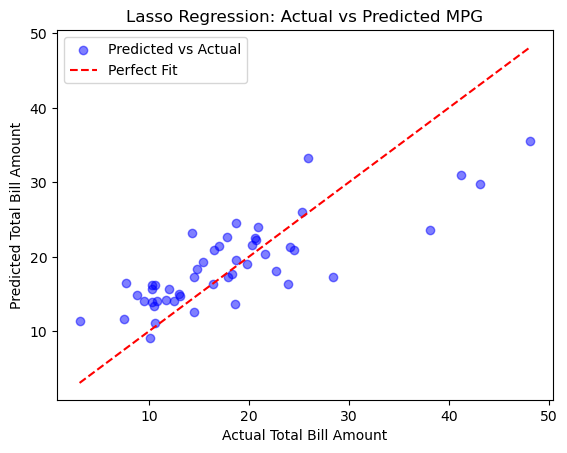

In [7]:
#Scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Fit")

plt.xlabel("Actual Total Bill Amount")
plt.ylabel("Predicted Total Bill Amount")
plt.title("Lasso Regression: Actual vs Predicted MPG")
plt.legend()
plt.show()